In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from collections import defaultdict

import sys
sys.path.insert(0, '..')
from utils.plot_lib import set_default

set_default(figsize=(6, 4))

### Discrete Markov Chain

Suppose you have a secret number (make it an integer) between 1 and 5. We will call it your initial number at step 1. Now for each time step, your secret number will change according to the following rules:

1. Flip a coin.
2. - If the coin turns up heads, then increase your secret number by one (5 increases to 1).
   - If the coin turns up tails, then decrease your secret number by one (1 decreases to 5).
3. Repeat $n$ times, and record the evolving history of your secret number.

Before the experiment, we can think of the sequence of secret numbers as a sequence of random variables, each taking on a value in ${1,2,3,4,5}$.

Assume that the coin is fair, so that with each flip, the probability of heads and tails are both 0.5.

Does this game qualify as a true Markov chain? Suppose your secret number is currently $4$ and that the history of your secret numbers is $(2,1,2,3)$.

What is the probability that on the next step, your secret number will be 5? What about the other four possibilities? Because of the rules of this game, the probability of the next transition will depend only on the fact that your current number is 4. The numbers further back in your history are irrelevant, so this is a Markov chain.

This is an example of a discrete Markov chain, where the possible values of the random variables come from a discrete set. Those possible values (secret numbers in this example) are called states of the chain. The states are usually numbers, as in this example, but they can represent anything. In one common example, the states describe the weather on a particular day, which could be labeled as 1-fair, 2-poor.

### Random walk (Continuos)

Now let’s look at a continuous example of a Markov chain. Say $X_t=0$ and we have the following transition model: $p(X_t+1|X_t=x_t)=\mathcal{N}(x_t,1)$. That is, the probability distribution for the next state is Normal with variance 1 and mean equal to the current state. This is often referred to as a “random walk.” Clearly, it is a Markov chain because the transition to the next state $X_t+1$ only depends on the current state $X_t$.

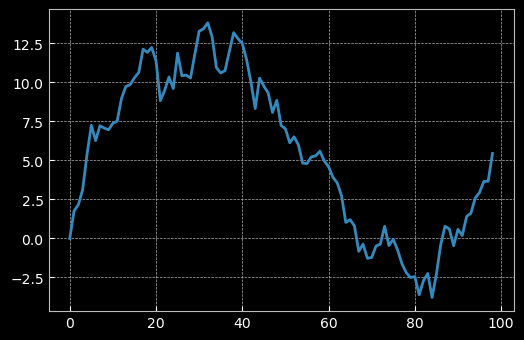

In [6]:
# Set a random seed
np.random.seed(seed = 0)
var = 1
# Samples
n = 100
samples = []
samples.append(0)
for i in range(1, n - 1):
    sample = np.random.normal(samples[i - 1], np.sqrt(var), 1)
    samples.append(sample)

plt.plot(samples)

### Transition

Let’s return to our example of the discrete Markov chain. If we assume that transition probabilities do not change with time, then there are a total of $25 (5^2)$ potential transition probabilities. Potential transition probabilities would be from State 1 to State 2, State 1 to State 3, and so forth. These transition probabilities can be arranged into a matrix $Q$: 

$Q = 
\begin{pmatrix}
0 & .5 & 0 & 0 & .5 \\
.5 & 0 & .5 & 0 & 0 \\
0 & .5 & 0 & .5 & 0 \\
0 & 0 & .5 & 0 & .5 \\
.5 & 0 & 0 & .5 & 0 \\
\end{pmatrix}$

where the transitions from State 1 are in the first row, the transitions from State 2 are in the second row, etc. For example, the probability $p(X_t+1=5∣X_t=4)$ can be found in the fourth row, fifth column.

The transition matrix is especially useful if we want to find the probabilities associated with multiple steps of the chain. For example, we might want to know $p(X_{t+2}=3∣X_t=1)$, the probability of your secret number being 3 two steps from now, given that your number is currently 1. We can calculate this as $\sum_{k=1}^5 p(X_{t+2}=3 \mid X_{t+1}=k) \cdot p(X_{t+1}=k \mid X_t=1)$, which conveniently is found in the first row and third column of $Q^2$.


In [7]:
Q = np.matrix([[0.0, 0.5, 0.0, 0.0, 0.5], [0.5, 0.0, 0.5, 0.0, 0.0],
               [0.0, 0.5, 0.0, 0.5, 0.0], [.0, 0.0, 0.5, 0.0, 0.5], [0.5, 0.0, 0.0, 0.5, 0.0]])
Q_squared = Q**2
print(Q_squared)

[[0.5  0.   0.25 0.25 0.  ]
 [0.   0.5  0.   0.25 0.25]
 [0.25 0.   0.5  0.   0.25]
 [0.25 0.25 0.   0.5  0.  ]
 [0.   0.25 0.25 0.   0.5 ]]


In [8]:
#  P(X_t+2 = 3 | X_t = 1)
print(Q_squared[0,2])

0.25


### Stationary distribution

Suppose we want to know the probability distribution of the your secret number in the distant future, say $p(X_{t+h}|X_t)$ where $h$ is a large number. Let’s calculate this for a few different values of h.

In [9]:
Q5 = Q * Q* Q * Q * Q
print(np.round(Q5, 3))

[[0.062 0.312 0.156 0.156 0.312]
 [0.312 0.062 0.312 0.156 0.156]
 [0.156 0.312 0.062 0.312 0.156]
 [0.156 0.156 0.312 0.062 0.312]
 [0.312 0.156 0.156 0.312 0.062]]


In [10]:
# For h = 30
Q30 = Q
for i in range(30-1):
    Q30 = Q30 * Q
print(np.round(Q30, 3))

[[0.201 0.199 0.2   0.2   0.199]
 [0.199 0.201 0.199 0.2   0.2  ]
 [0.2   0.199 0.201 0.199 0.2  ]
 [0.2   0.2   0.199 0.201 0.199]
 [0.199 0.2   0.2   0.199 0.201]]


Notice that as the future horizon gets more distant, the transition distributions appear to converge. The state you are currently in becomes less important in determining the more distant future. If we let $h$ get really large, and take it to the limit, all the rows of the long-range transition matrix will become equal to $(.2,.2,.2,.2,.2)$. That is, if you run the Markov chain for a very long time, the probability that you will end up in any particular state is $\frac{1}{5} = .2$ for each of the five states. These long-range probabilities are equal to what is called the stationary distribution of the Markov chain.

The stationary distribution of a chain is the initial state distribution for which performing a transition will not change the probability of ending up in any given state.

One consequence of this property is that once a chain reaches its stationary distribution, the stationary distribution will remain the distribution of the states thereafter.

In [11]:
n = 5000
x = []
x.append(1) # fix the state as 1 for time 1
for i in range(1, n-1):
    #print(x[i-1])
    val = np.random.choice([1, 2, 3, 4, 5], size = 1, p = sum(Q[x[i-1] - 1, :].tolist(), []))[0]
    # draw the next state from the intergers 1 to 5 with probabilities from 
    # the transition matrix Q, based on the previous value of X.
    x.append(val)

unique, counts = np.unique(x, return_counts=True)
print(dict(zip(unique, counts)))

# To obtain the probabilities, divide the counts per n
p_counts = counts / n
print(dict(zip(unique, p_counts)))
print('The sum of all probabilies is: {}'.format(np.sum(p_counts)))

{1: 998, 2: 1019, 3: 1020, 4: 1003, 5: 959}
{1: 0.1996, 2: 0.2038, 3: 0.204, 4: 0.2006, 5: 0.1918}
The sum of all probabilies is: 0.9997999999999999


As we have just seen, if you simulate a Markov chain for many iterations, the samples can be used as a Monte Carlo sample from the stationary distribution. This is exactly how we are going to use Markov chains for Bayesian inference. In order to simulate from a complicated posterior distribution, we will set up and run a Markov chain whose stationary distribution is the posterior distribution.

### Continuous example

The continuous random walk example we gave earlier does not have a stationary distribution. However, we can modify it so that it does have a stationary distribution.

Let the transition distribution be $p(X_{t+1} | X_t=x_t) = \text{N}(\phi x_t, 1)$ where $−1<ϕ<1$. That is, the probability distribution for the next state is Normal with variance 1 and mean equal to $ϕ$ times the current state. As long as $ϕ$ is between −1 and 1, then the stationary distribution will exist for this model.

Let’s simulate this chain for $ϕ=−0.6$.

The simulated mean is: -0.012058290974091938


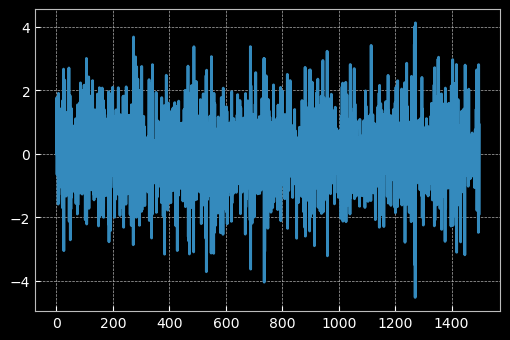

In [12]:
# Set a random seed
np.random.seed(seed = 0)

n = 1500
x = []
x.append(0) # Initial state
phi = -0.6
var = 1

for i in range(1, n - 1):
    sample = np.random.normal(phi * x[i - 1], np.sqrt(var), 1)[0]
    x.append(sample)

plt.plot(x)
print('The simulated mean is: {}'.format(np.mean(x)))

The theoretical stationary distribution for this chain is normal with mean 0 and variance $1/(1−ϕ^2)$, which in our example approximately equals 1.562.

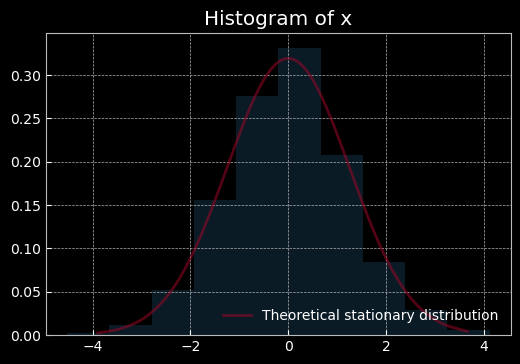

In [13]:
from scipy.stats import norm

mu = 0
var = 1.562
rv = norm(loc = mu, scale = np.sqrt(var))
draws = np.sort(rv.rvs(size=n))


# Plotting the histogram of the continuous random walf
fig, ax = plt.subplots(1, 1)
ax.hist(x, density=True, histtype='stepfilled', alpha=0.2)
ax.plot(draws, rv.pdf(draws), alpha=0.5, label = 'Theoretical stationary distribution')
ax.legend(loc='best', frameon=False)
plt.title('Histogram of x')
plt.show()

It appears that the chain has reached the stationary distribution. Therefore, we could treat this simulation from the chain like a Monte Carlo sample from the stationary distribution, a normal with mean 0 and variance 1.562.